In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
data = pd.read_csv('/Placement_Data_Full_Class.csv')


total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 215


In [6]:
# Первые 5 строк датасета
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [14]:
# размер набора данных
data.shape

(215, 15)

In [15]:

# типы колонок
data.dtypes


sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [16]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [17]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((215, 15), (215, 14))

In [18]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((215, 15), (148, 15))

In [19]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [20]:
# Заполнение всех пропущенных значений нулями
data_new_3 = data.fillna(0)
data_new_3.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [21]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка salary. Тип данных float64. Количество пустых значений 67, 31.16%.


In [22]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,salary
0,270000.0
1,200000.0
2,250000.0
3,NaN
4,425000.0
...,...
210,400000.0
211,275000.0
212,295000.0
213,204000.0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


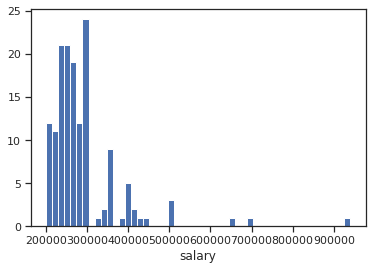

In [23]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [24]:

# Фильтр по пустым значениям поля salary 
data[data['salary'].isnull()]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


In [25]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['salary'].isnull()].index
flt_index

Int64Index([  3,   5,   6,   9,  12,  14,  17,  18,  25,  29,  31,  34,  36,
             41,  42,  45,  46,  49,  51,  52,  63,  65,  68,  75,  79,  82,
             87,  91,  93,  97,  99, 100, 105, 106, 109, 111, 120, 130, 136,
            141, 144, 149, 155, 158, 159, 161, 165, 167, 168, 169, 170, 173,
            175, 179, 181, 182, 184, 186, 188, 189, 190, 194, 198, 201, 206,
            208, 214],
           dtype='int64')

In [26]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


In [27]:

# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['salary']

3     NaN
5     NaN
6     NaN
9     NaN
12    NaN
       ..
198   NaN
201   NaN
206   NaN
208   NaN
214   NaN
Name: salary, Length: 67, dtype: float64

In [28]:
data_num_salary = data_num[['salary']]
data_num_salary.head()

,salary
0,270000.0
1,200000.0
2,250000.0
3,NaN
4,425000.0


In [0]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [30]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_salary)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [0]:
strategies=['mean', 'median','most_frequent']

In [0]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_salary)
    return data_num_imp[mask_missing_values_only]

In [33]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
        288655.40540541, 288655.40540541, 288655.40540541, 288655.40540541,
   

In [34]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000., 265000., 265000., 265000.,
        265000., 265000., 265000., 265000.]))

In [35]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000., 300000., 300000., 300000.,
        300000., 300000., 300000., 300000.]))

In [0]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [37]:
data[['salary']].describe()

,salary
count,148.000000
mean,288655.405405
std,93457.452420
min,200000.000000
25%,240000.000000
50%,265000.000000
75%,300000.000000
max,940000.000000


In [39]:
test_num_impute_col(data, 'salary', strategies[0])

('salary', 'mean', 67, 288655.4054054054, 288655.4054054054)

In [41]:
test_num_impute_col(data, 'salary', strategies[1])

('salary', 'median', 67, 265000.0, 265000.0)

In [43]:
test_num_impute_col(data, 'salary', strategies[2])

('salary', 'most_frequent', 67, 300000.0, 300000.0)

In [54]:
cat_temp_data = data[['degree_t']]
cat_temp_data.head()

,degree_t
0,Sci&Tech
1,Sci&Tech
2,Comm&Mgmt
3,Sci&Tech
4,Comm&Mgmt


In [55]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Sci&Tech'],
       ['Sci&Tech'],
       ['Comm&Mgmt'],
       ['Sci&Tech'],
       ['Comm&Mgmt'],
       ['Sci&Tech'],
       ['Comm&Mgmt'],
       ['Sci&Tech'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Sci&Tech'],
       ['Sci&Tech'],
       ['Sci&Tech'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Sci&Tech'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Others'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Sci&Tech'],
       ['Comm&Mgmt'],
       ['Sci&Tech'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Others'],
       ['Comm&Mgmt'],
       ['Comm&Mgmt'],
       ['Sci&Tech'],
      

In [56]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Sci&Tech
1,Sci&Tech
2,Comm&Mgmt
3,Sci&Tech
4,Comm&Mgmt
...,...
210,Comm&Mgmt
211,Sci&Tech
212,Comm&Mgmt
213,Comm&Mgmt


In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [59]:
cat_enc['c1'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [60]:
np.unique(cat_enc_le)

array([0, 1, 2])

In [62]:
le.inverse_transform([0, 1, 2])

array(['Comm&Mgmt', 'Others', 'Sci&Tech'], dtype=object)

In [0]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [64]:
cat_enc.shape

(215, 1)

In [65]:
cat_enc_ohe.shape

(215, 3)

In [66]:
cat_enc_ohe

<215x3 sparse matrix of type '<class 'numpy.float64'>'
	with 215 stored elements in Compressed Sparse Row format>

In [67]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.]])

In [68]:
cat_enc.head(10)

,c1
0,Sci&Tech
1,Sci&Tech
2,Comm&Mgmt
3,Sci&Tech
4,Comm&Mgmt
5,Sci&Tech
6,Comm&Mgmt
7,Sci&Tech
8,Comm&Mgmt
9,Comm&Mgmt


In [69]:
pd.get_dummies(cat_enc).head()

,c1_Comm&Mgmt,c1_Others,c1_Sci&Tech
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [70]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,degree_t_nan
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0


In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [0]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['degree_p']])

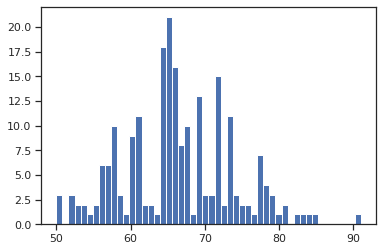

In [73]:
plt.hist(data['degree_p'], 50)
plt.show()

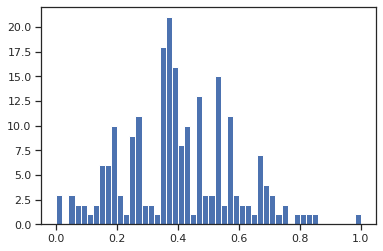

In [74]:
plt.hist(sc1_data, 50)
plt.show()

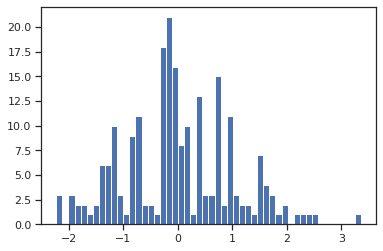

In [75]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['degree_p']])

plt.hist(sc2_data, 50)
plt.show()

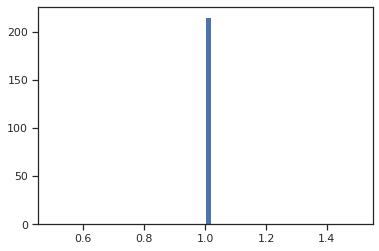

In [76]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['degree_p']])


plt.hist(sc3_data, 50)
plt.show()